In [1]:
import numpy as np
import pencil as pc
import matplotlib.pyplot as plt
import modes

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['text.usetex'] = True

In [3]:
sim = pc.get_sim(quiet=True)
xyaver = pc.read.aver(plane_list=['xy'])
ts = pc.read.ts()
yaver = pc.read.aver(plane_list='y')

Read 3421 lines.


In [9]:
class Butterfly(modes.Modes):
    def __init__(self, sim, ts, xyaver, yaver, ini=False, dyn=True):
        super().__init__(sim, ts, xyaver, yaver, ini=False, dyn=True)

        self.by = [self.bxmz, self.bymz]
        try:
            self.by2 = [self.bx2mz, self.by2mz]
            self.by2sqr = np.sqrt(self.by2)
        except AttributeError:
            print("Have you included bx2mz and by2mz in xyaver.in?")

    def plot(self, ticks=False):

        left, width = .488, .5
        bottom, height = .45, .5
        right = left + width
        top = bottom + height

        gs_kw = dict(width_ratios=[2, 0.1], height_ratios=[1, 1])
        fig, axs = plt.subplot_mosaic([['upper left', 'right'],
                                    ['lower left', 'right']],
                                    gridspec_kw=gs_kw, figsize=(8,5),
                                    layout="constrained")

        props = dict(boxstyle='round', facecolor='white', alpha=0.8)

        pos = ['upper left', 'lower left']

        [X, Y] = np.meshgrid(self.xyaver.t, self.z)

        try:
            title = [r'$\langle B_x \rangle _{xy}/\sqrt{\langle B_{\vphantom{y}x}^2 \rangle _{xy}}$', r'$\langle B_y \rangle _{xy}/\sqrt{\langle B_y^2 \rangle _{xy}}$']
            for i in range(len(pos)):
                axs[pos[i]].contourf(X, Y, np.transpose(self.by[i]/self.by2sqr[i]), 100, cmap='magma', vmin=np.min(self.by/self.by2sqr), vmax=np.max(self.by/self.by2sqr))
                # axs[pos[i]].set_title(title[i])
                axs[pos[i]].text(right, top, title[i], transform=axs[pos[i]].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)
                axs[pos[i]].set_xlabel(r'$t$')
                axs[pos[i]].set_ylabel(r'$z$')

            ims = axs[pos[0]].contourf(X, Y, np.transpose(self.by[0]/self.by2sqr[0]), 100, cmap='magma', vmin=np.min(self.by/self.by2sqr), vmax=np.max(self.by/self.by2sqr))

            plt.tight_layout()
            plt.suptitle(r'$Butterfly$ $Diagram$')
            plt.subplots_adjust(top=0.92)
            cbar = fig.colorbar(ims, cax=axs['right'])#, ticks=[-.3, -.2, -.1, 0, .1, .2, .3])
            if ticks:
                cbar.set_ticks(ticks)
            fig.tight_layout()
            plt.savefig('plots/butterfly.pdf',bbox_inches='tight')
            # plt.show()
        except:
            title = [r'$\langle B_x \rangle _{xy}$', r'$\langle B_y \rangle _{xy}$']
            for i in range(len(pos)):
                axs[pos[i]].contourf(X, Y, np.transpose(self.by[i]), 100, cmap='magma', vmin=np.min(self.by), vmax=np.max(self.by))
                # axs[pos[i]].set_title(title[i])
                axs[pos[i]].text(right, top, title[i], transform=axs[pos[i]].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)
                axs[pos[i]].set_xlabel(r'$t$')
                axs[pos[i]].set_ylabel(r'$z$')

            ims = axs[pos[0]].contourf(X, Y, np.transpose(self.by[0]), 100, cmap='magma', vmin=np.min(self.by), vmax=np.max(self.by))

            plt.tight_layout()
            plt.suptitle(r'$Butterfly$ $Diagram$')
            plt.subplots_adjust(top=0.92)
            cbar = fig.colorbar(ims, cax=axs['right'])#, ticks=[-.3, -.2, -.1, 0, .1, .2, .3])
            if ticks:
                cbar.set_ticks(ticks)
            fig.tight_layout()
            # plt.savefig('plots/butterfly.pdf',bbox_inches='tight')
            plt.show()

    pass

In [10]:
img = Butterfly(sim, ts, xyaver, yaver, ini=False, dyn=True)

In [11]:
np.shape(img.by)

(2, 1711, 256)

/tmp/ipykernel_3048977/2763446916.py:42: UserWarning:

The figure layout has changed to tight



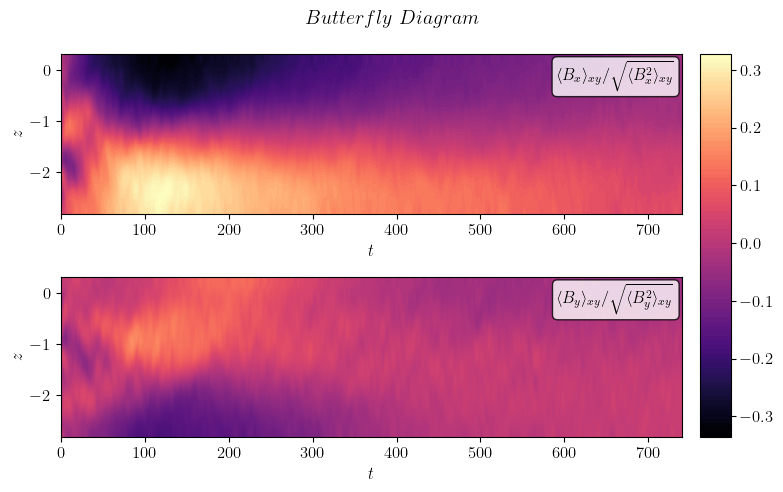

In [13]:
img.plot([-.3, -.2, -.1, 0, .1, .2, .3])